# Introduction

This is a step-by-step lab on how to use AdaBoost to train a decision stump and classify a two-dimensional dataset composed of two Gaussian quantiles clusters.

# Import necessary libraries

In this step, we will import the necessary libraries for this lab.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.inspection import DecisionBoundaryDisplay

# Construct dataset

In this step, we will create a non-linearly separable classification dataset composed of two Gaussian quantiles clusters using the **make_gaussian_quantiles** function from the **sklearn.datasets** module. We will also concatenate the two clusters and assign labels to them.

In [5]:
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

# Create and fit an AdaBoosted decision tree

In this step, we will create an AdaBoosted decision tree using the **AdaBoostClassifier** class from the **sklearn.ensemble** module. We will use the decision tree as the base estimator and set the **max_depth** parameter to 1. We will also set the **algorithm** parameter to "SAMME" and the **n_estimators** parameter to 200. Finally, we will fit the classifier to the dataset.

In [6]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

bdt.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

# Plot the decision boundaries and training points

In this step, we will plot the decision boundaries and training points. We will create a **DecisionBoundaryDisplay** object using the **from_estimator** method from the **sklearn.inspection** module and pass in the AdaBoost classifier, the dataset, and other parameters. We will also plot the training points using different colors for each class.

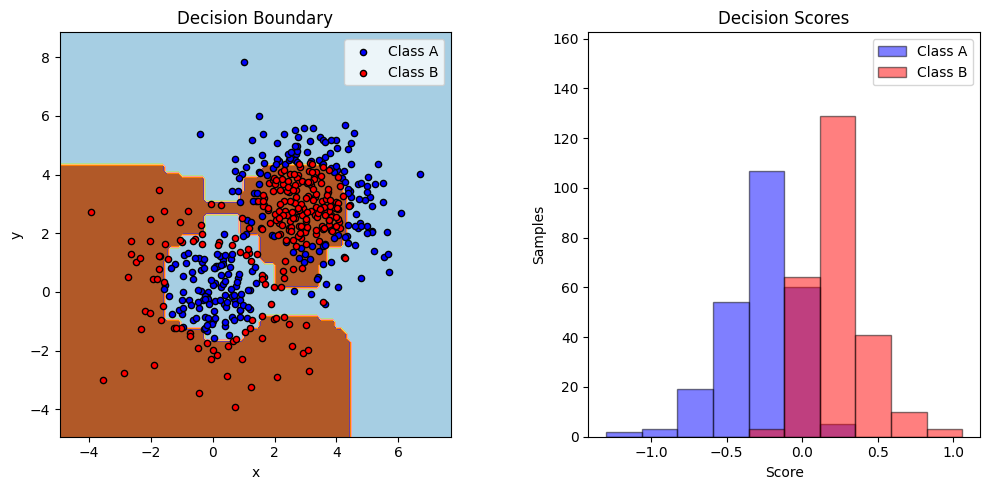

In [10]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x",
    ylabel="y",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = (y == i).nonzero()
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary")


# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

# Summary

In this lab, we learned how to use AdaBoost to train a decision stump and classify a two-dimensional dataset composed of two Gaussian quantiles clusters. We also learned how to plot the decision boundaries and decision scores of the classifier.